<a href="https://colab.research.google.com/github/luislucianozurdogmailcom/PREDICCION_DE_LA_PROPAGACION_DE_DENGUE/blob/main/Entrega_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIÓN DE LA PROPAGACIÓN DE DENGUE**

##**Proyecto final de Data Science - Coderhouse**

 ### **Introducción**

 La fiebre del dengue es una enfermedad transmitida por mosquitos que se presenta en partes tropicales y subtropicales del mundo. En los casos leves, los síntomas son similares a los de la gripe: fiebre, sarpullido y dolor muscular y articular. En casos severos, la fiebre del dengue puede causar sangrado severo, presión arterial baja e incluso la muerte.

Debido a que es transportado por mosquitos, la dinámica de transmisión del dengue está relacionada con variables climáticas como la temperatura y la precipitación. Aunque la relación con el clima es compleja, un número creciente de científicos argumentan que es probable que el cambio climático produzca cambios en la distribución que tendrán importantes implicaciones para la salud pública en todo el mundo .

En los últimos años la fiebre del dengue se ha ido propagando. Históricamente, la enfermedad ha sido más frecuente en el sudeste de Asia y las islas del Pacífico. En estos días, muchos de los casi 500 millones de casos por año están ocurriendo en América Latina.

### **Problema a resolver y objetivo**

Con los datos ambientales recopilados por varias agencias del gobierno federal de los EE. UU., desde los Centros para el Control y la Prevención de Enfermedades hasta la Administración Nacional Oceánica y Atmosférica del Departamento de Comercio de los EE. UU, se buscará predecir la cantidad de casos de dengue cada semana (en cada ubicación) en función de las variables ambientales que describen los cambios de temperatura, precipitación, vegetación y más.

### **Integrantes** 
 * Joaquín Saharrea
 * Virginia Marich
 * Luciano Zurdo
 * Milagros Salvatierra


**Fuente:** https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/ 

# DESARROLLO DEL PROYECTO



*Importación de librerias*

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import pandas_profiling 
from pandas_profiling import ProfileReport
import pylab
import scipy
from scipy import stats
import sklearn
from scipy.stats import shapiro
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import tree
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from google.colab import files

*Data Acquisition*

In [ ]:
files.upload()
df=pd.read_csv('dengue_data.csv') # Data set de caracteristicas climaticas df:data features
dc=pd.read_csv('dengue_cases.csv') # Data set de casos de dengue por ciudad y año dc: data cases

Saving dengue_cases.csv to dengue_cases.csv
Saving dengue_data.csv to dengue_data.csv


## ANALIZAMOS CADA DATA SET POR SEPARADO

*Analisis de data set de features (df)*

In [ ]:
df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [ ]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

*Referencias de variables*

* city: ciudades - en el data set figuran como 'sj' y 'iq', refiriendose a "San Juan, Puerto Rico" y por otro lado "Iquito, Peru". 

* ndvi: indice de vegetación - ne: noreste, nw: noroeste, se: sudeste, sw: sudoeste

* dew_point: punto de rocío. Cuanto mayor sea el punto de rocío, mayor será la cantidad de humedad en el aire.

* reanalysis: reanálisis del clima es un método científico para desarrollar un registro completo de cómo el tiempo y el clima están cambiando con el tiempo. En él, las observaciones y un modelo se combinan para generar una estimación de parametros.  

* tdtr: rango de temperatura diurna 

* station: se refiere a las mediciones dadas por el modelo de estación, se llama modelo de estación porque muestra el clima medido en una estación meteorológica en particular, o un área donde se mide el clima. 



In [ ]:
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas.')

Este data set tiene 1456 filas, y 24 columnas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [ ]:
type(df)

pandas.core.frame.DataFrame

## *Data Wrangling*

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

**OBSERVACIÓN: Se detectan datos faltantes en varias columnas - se debe proceder al tratamiento de los mismos previo a un análisis**



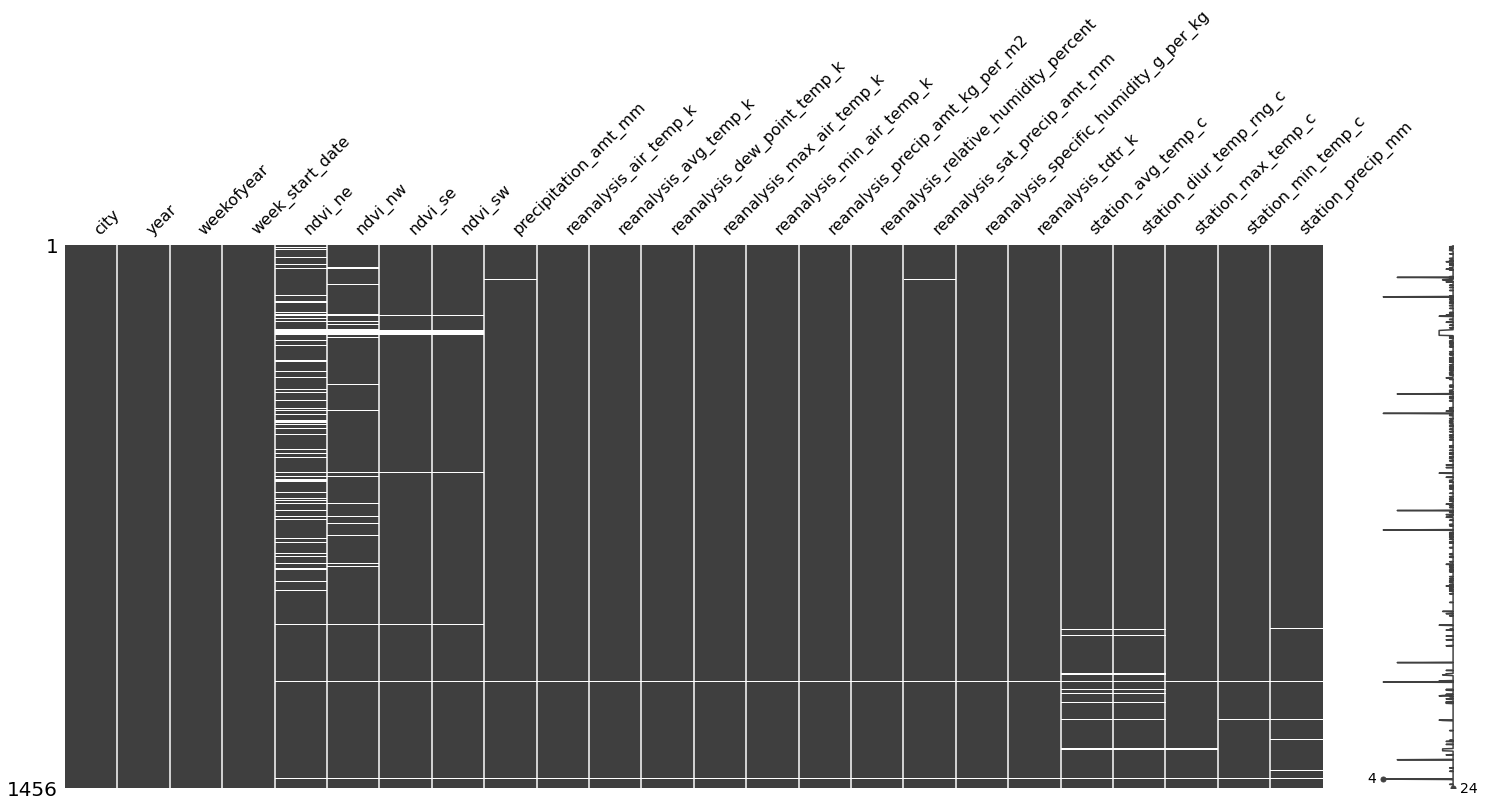

In [ ]:
#Observando la distribución de datos faltantes 

%matplotlib inline
msno.matrix(df)

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 24 columns.
There are 20 columns that have missing values.


Missing Values  % of Total Values
ndvi_ne                                           194               13.3
ndvi_nw                                            52                3.6
station_diur_temp_rng_c                            43                3.0
station_avg_temp_c                                 43                3.0
station_precip_mm                                  22                1.5
ndvi_sw                                            22                1.5
ndvi_se                                            22                1.5
station_max_temp_c                                 20                1.4
station_min_temp_c                                 14                1.0
precipitation_amt_mm                               13                0.9
reanalysis_sat_precip_amt_mm                       13                0.9
reanalysis_air_temp_k                              10                0.7
reanalysis_avg_temp_k                              10                0.7
reanalysis_dew_point_temp_k                        10                0.7
reanalysis_max_air_temp_k                          10                0.7
reanalysis_min_air_temp_k                          10                0.7
reanalysis_relative_humidity_percent               10                0.7
reanalysis_specific_humidity_g_per_kg              10                0.7
reanalysis_tdtr_k                                  10                0.7
reanalysis_precip_amt_kg_per_m2                    10                0.7

**OBSERVACION**: *ndvi* contiene más del 13.3% de sus datos faltantes. Se debe estudiar su relación con otras variables para definir el método de tratamiento más apropiado. 

In [ ]:
df.corr()

year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.071649  0.223361   
weekofyear                            -0.071649    1.000000  0.053548   
ndvi_ne                                0.223361    0.053548  1.000000   
ndvi_nw                                0.144345    0.048759  0.850902   
ndvi_se                                0.234234    0.121557  0.614380   
ndvi_sw                                0.277759    0.068701  0.669504   
precipitation_amt_mm                   0.205302    0.118037  0.205736   
reanalysis_air_temp_k                 -0.140016    0.425753 -0.340976   
reanalysis_avg_temp_k                  0.085043    0.463677 -0.037682   
reanalysis_dew_point_temp_k            0.132273    0.348946  0.056077   
reanalysis_max_air_temp_k              0.480402    0.238078  0.634330   
reanalysis_min_air_temp_k             -0.392351    0.179679 -0.623116   
reanalysis_precip_amt_kg_per_m2        0.132625    0.072955  0.199411   
reanalysis_relative_humidity_percent   0.336349   -0.015191  0.457985   
reanalysis_sat_precip_amt_mm           0.205302    0.118037  0.205736   
reanalysis_specific_humidity_g_per_kg  0.161596    0.350821  0.094852   
reanalysis_tdtr_k                      0.490542    0.077933  0.673935   
station_avg_temp_c                     0.047010    0.368408  0.186227   
station_diur_temp_rng_c                0.373644    0.023220  0.658129   
station_max_temp_c                     0.227320    0.232098  0.491922   
station_min_temp_c                    -0.214482    0.292362 -0.315696   
station_precip_mm                      0.219910    0.066294  0.242263   

                                        ndvi_nw   ndvi_se   ndvi_sw  \
year                                   0.144345  0.234234  0.277759   
weekofyear                             0.048759  0.121557  0.068701   
ndvi_ne                                0.850902  0.614380  0.669504   
ndvi_nw                                1.000000  0.555809  0.651938   
ndvi_se                                0.555809  1.000000  0.820924   
ndvi_sw                                0.651938  0.820924  1.000000   
precipitation_amt_mm                   0.193563  0.074633  0.124047   
reanalysis_air_temp_k                 -0.317862 -0.157447 -0.227824   
reanalysis_avg_temp_k                 -0.030974  0.051348  0.022533   
reanalysis_dew_point_temp_k            0.063289  0.002810  0.020746   
reanalysis_max_air_temp_k              0.606775  0.468054  0.546460   
reanalysis_min_air_temp_k             -0.588806 -0.407931 -0.494284   
reanalysis_precip_amt_kg_per_m2        0.190989  0.034792  0.101652   
reanalysis_relative_humidity_percent   0.449152  0.215606  0.311759   
reanalysis_sat_precip_amt_mm           0.193563  0.074633  0.124047   
reanalysis_specific_humidity_g_per_kg  0.100626  0.028795  0.053437   
reanalysis_tdtr_k                      0.645596  0.486047  0.569554   
station_avg_temp_c                     0.203975  0.089242  0.121060   
station_diur_temp_rng_c                0.649483  0.449599  0.545899   
station_max_temp_c                     0.490122  0.290691  0.377393   
station_min_temp_c                    -0.304206 -0.251621 -0.294684   
station_precip_mm                      0.221314  0.131326  0.158345   

                                       precipitation_amt_mm  \
year                                               0.205302   
weekofyear                                         0.118037   
ndvi_ne                                            0.205736   
ndvi_nw                                            0.193563   
ndvi_se                                            0.074633   
ndvi_sw                                            0.124047   
precipitation_amt_mm                               1.000000   
reanalysis_air_temp_k                             -0.017229   
reanalysis_avg_temp_k                              0.106384   
reanalysis_dew_point_temp_k                        0.434722   
reanalysis_max_air_temp_k           

**En base a la correlación lineal al realizar df.corr() adoptaria el criterio de rellenar los valores faltantes de ndvi_ne de acuerdo a la correlacion con ndvi_nw (coef=0.85), en el caso de que ndvi_nw no exista al mismo tiempo, buscaria la siguiente correlacion de variable con ndvi_ne (o si esos son los menores casos y no es un % significativo, eliminar el faltante).**

In [ ]:
print('Correlación Pearson: ', df['ndvi_ne'].corr(df['ndvi_nw'], method='pearson'))
print('Correlación spearman: ', df['ndvi_ne'].corr(df['ndvi_nw'], method='spearman'))
print('Correlación kendall: ', df['ndvi_ne'].corr(df['ndvi_nw'], method='kendall'))

Correlación Pearson:  0.8509019513097035
Correlación spearman:  0.8765420471836421
Correlación kendall:  0.6985679631563714


La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

**VERIFICACION DE NORMALIDAD**

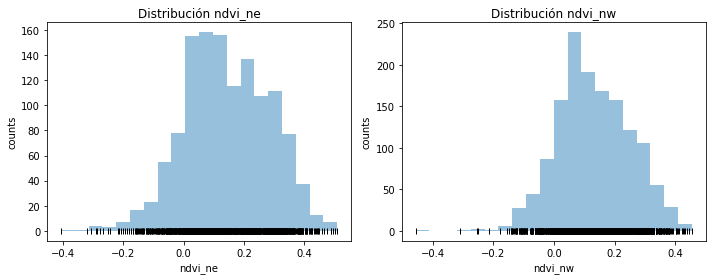

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=df.ndvi_ne, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(df.ndvi_ne, np.full_like(df.ndvi_ne, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución ndvi_ne')
axs[0].set_xlabel('ndvi_ne')
axs[0].set_ylabel('counts')

axs[1].hist(x=df.ndvi_nw, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(df.ndvi_nw, np.full_like(df.ndvi_nw, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución ndvi_nw')
axs[1].set_xlabel('ndvi_nw')
axs[1].set_ylabel('counts')


plt.tight_layout();

*Si bien se observa una distribucion normal de las variables, utilizar el metodo de Pearson para determinar la significancia estadistica no es posible, porque no acepta valores NAN*

In [ ]:
r, p = stats.spearmanr(df['ndvi_ne'], df['ndvi_nw'],nan_policy='omit') 
print(f"Correlación Spearman: r={r}, p-value={p}")

Correlación Spearman: r=0.8765420471836421, p-value=0.0


* Los test estadísticos muestran una correlación lineal entre moderada y alta, con claras evidencias estadísticas de que la relación observada no se debe al azar ( pvalue≈0 ).

**Objetivo: obtener los valores de intercepto y pendiente de la función de correlación entre ndvi_ne y ndvi_nw, asi luego hacer fill na condicionado por esa función.**

In [ ]:
# El modelo no permite el calculo con valores NAN, por lo que se realiza una copia del data frame omitiendo los valores nulos. 

df2=df.dropna()
result = scipy.stats.linregress(df2['ndvi_nw'], df2['ndvi_ne'])

print("El coeficiente de correlación entre ndvi_ne y ndvi_nw es", result.rvalue)
print("La pendiente de la recta es:", result.slope)
print("El intercepto de la recta es:", result.intercept)
# En una línea de regresión, cuanto menor es el error estándar de la estimación, más precisas son las predicciones.
print ("El error estandar es: ", result.stderr)

El coeficiente de correlación entre ndvi_ne y ndvi_nw es 0.8472768365432132
La pendiente de la recta es: 0.983215700509831
El intercepto de la recta es: 0.007608827040175875
El error estandar es:  0.01781536990656996


*Analisis de data set de casos (dc)*

In [ ]:
dc.head()
dc

city  year  weekofyear  total_cases
0      sj  1990          18            4
1      sj  1990          19            5
2      sj  1990          20            4
3      sj  1990          21            3
4      sj  1990          22            6
...   ...   ...         ...          ...
1451   iq  2010          21            5
1452   iq  2010          22            8
1453   iq  2010          23            1
1454   iq  2010          24            1
1455   iq  2010          25            4

[1456 rows x 4 columns]

In [ ]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [ ]:
dc.duplicated().sum()

0

**Union de data sets**

In [ ]:
df2=pd.concat([df, dc], axis=1)
df2

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0       sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1       sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2       sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3       sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4       sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...    ...   ...         ...             ...       ...       ...       ...   
1451    iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452    iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453    iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454    iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455    iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286           28.942857                 9.371429   
...                 ...                 ...                      ...   
1451           9.800000           28.633333                11.933333   
1452           7.471429           27.433333                10.500000   
1453           7.500000           24.400000                 6.900000   
1454           7.871429           25.433333                 8.733333   
1455          11.014286           27.475000                 9.900000   

      station_max_temp_c  station_min_temp_c  station_precip_mm  city  year  \
0                   29.4                20.0               16.0    sj  1990   
1                   31.7                22.2                8.6    sj  1990   
2                   32.2                22.8               41.4    sj  1990   
3                   33.3                23.3                4.0    sj  1990   
4                   35.0                23.9                5.8    sj  1990   
...                  ...                 ...                ...   ...   ...   
1451                35.4                22.4               27.0    iq  2010   
1452                34.7                21.7               36.6    iq  2010   
1453                32.2                19.2                7.4    iq  2010   
1454                31.2                21.0               16.0    iq  2010   
1455                33.7                22.2               20.4    iq  2010   

      weekofyear  total_cases  
0             18            4  
1             19            5  
2             20            4  
3             21            3  
4             22            6  
...          ...          ...  
1451          21            5  
1452          22            8  
1453          23            1  
1454          24            1  
1455          25            4  

[1456 rows x 28 columns]

## Análisis univariado

In [ ]:
data=df2.T.drop_duplicates().T
data

city  year weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990         18      1990-04-30    0.1226  0.103725  0.198483   
1      sj  1990         19      1990-05-07    0.1699  0.142175  0.162357   
2      sj  1990         20      1990-05-14   0.03225  0.172967    0.1572   
3      sj  1990         21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990         22      1990-05-28    0.1962    0.2622    0.2512   
...   ...   ...        ...             ...       ...       ...       ...   
1451   iq  2010         21      2010-05-28   0.34275    0.3189  0.256343   
1452   iq  2010         22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010         23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010         24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010         25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw precipitation_amt_mm reanalysis_air_temp_k  ...  \
0     0.177617                12.42            297.572857  ...   
1     0.155486                22.82            298.211429  ...   
2     0.170843                34.54            298.781429  ...   
3     0.235886                15.36            298.987143  ...   
4      0.24734                 7.52            299.518571  ...   
...        ...                  ...                   ...  ...   
1451  0.292514                 55.3            299.334286  ...   
1452  0.225657                86.47                298.33  ...   
1453  0.233714                58.94            296.598571  ...   
1454  0.325486                59.67            296.345714  ...   
1455  0.315757                63.22            298.097143  ...   

     reanalysis_precip_amt_kg_per_m2 reanalysis_relative_humidity_percent  \
0                               32.0                            73.365714   
1                              17.94                            77.368571   
2                               26.1                            82.052857   
3                               13.9                            80.337143   
4                               12.2                                80.46   
...                              ...                                  ...   
1451                            45.0                            88.765714   
1452                           207.1                                 91.6   
1453                            50.6                                94.28   
1454                           62.33                                94.66   
1455                            36.9                            89.082857   

     reanalysis_specific_humidity_g_per_kg reanalysis_tdtr_k  \
0                                14.012857          2.628571   
1                                15.372857          2.371429   
2                                16.848571               2.3   
3                                16.672857          2.428571   
4                                    17.21          3.014286   
...                                    ...               ...   
1451                             18.485714               9.8   
1452                                 18.07          7.471429   
1453                             17.008571               7.5   
1454                             16.815714          7.871429   
1455                             17.355714         11.014286   

     station_avg_temp_c station_diur_temp_rng_c station_max_temp_c  \
0             25.442857                     6.9               29.4   
1             26.714286                6.371429               31.7   
2             26.714286                6.485714               32.2   
3             27.471429                6.771429               33.3   
4             28.942857                9.371429               35.0   
...                 ...                     ...                ...   
1451          28.633333               11.933333               35.4   
1452          27.433333                    10

Primero revisamos los tipos de datos que tenemos en el dataset

In [ ]:
for i in data.columns:
  print('Para la columna "',i,'" el tipo de dato asociado es ',data[i].dtype)

Para la columna " city " el tipo de dato asociado es  object
Para la columna " year " el tipo de dato asociado es  object
Para la columna " weekofyear " el tipo de dato asociado es  object
Para la columna " week_start_date " el tipo de dato asociado es  object
Para la columna " ndvi_ne " el tipo de dato asociado es  object
Para la columna " ndvi_nw " el tipo de dato asociado es  object
Para la columna " ndvi_se " el tipo de dato asociado es  object
Para la columna " ndvi_sw " el tipo de dato asociado es  object
Para la columna " precipitation_amt_mm " el tipo de dato asociado es  object
Para la columna " reanalysis_air_temp_k " el tipo de dato asociado es  object
Para la columna " reanalysis_avg_temp_k " el tipo de dato asociado es  object
Para la columna " reanalysis_dew_point_temp_k " el tipo de dato asociado es  object
Para la columna " reanalysis_max_air_temp_k " el tipo de dato asociado es  object
Para la columna " reanalysis_min_air_temp_k " el tipo de dato asociado es  object
Pa

Como tenemos muchas columnas de tipo object pasamos las numericas a numeros

In [ ]:
data['year']                                  = pd.to_numeric(data['year']);
data['weekofyear']                            = pd.to_numeric(data['weekofyear']);
data['week_start_date']                       = pd.to_datetime(data['week_start_date']);
data['ndvi_ne']                               = pd.to_numeric(data['ndvi_ne']);
data['ndvi_nw']                               = pd.to_numeric(data['ndvi_nw']);
data['ndvi_se']                               = pd.to_numeric(data['ndvi_se']);
data['ndvi_sw']                               = pd.to_numeric(data['ndvi_sw']);
data['precipitation_amt_mm']                  = pd.to_numeric(data['precipitation_amt_mm']);
data['reanalysis_air_temp_k']                 = pd.to_numeric(data['reanalysis_air_temp_k']);
data['reanalysis_avg_temp_k']                 = pd.to_numeric(data['reanalysis_avg_temp_k']);
data['reanalysis_dew_point_temp_k']           = pd.to_numeric(data['reanalysis_dew_point_temp_k']);
data['reanalysis_max_air_temp_k']             = pd.to_numeric(data['reanalysis_max_air_temp_k']);
data['reanalysis_min_air_temp_k']             = pd.to_numeric(data['reanalysis_min_air_temp_k']);
data['reanalysis_precip_amt_kg_per_m2']       = pd.to_numeric(data['reanalysis_precip_amt_kg_per_m2']);
data['reanalysis_relative_humidity_percent']  = pd.to_numeric(data['reanalysis_relative_humidity_percent']);
data['reanalysis_specific_humidity_g_per_kg'] = pd.to_numeric(data['reanalysis_relative_humidity_percent']);
data['reanalysis_tdtr_k']                     = pd.to_numeric(data['reanalysis_tdtr_k']);
data['station_avg_temp_c']                    = pd.to_numeric(data['station_avg_temp_c']);
data['station_diur_temp_rng_c']               = pd.to_numeric(data['station_diur_temp_rng_c']);
data['station_max_temp_c']                    = pd.to_numeric(data['station_max_temp_c']);
data['station_min_temp_c']                    = pd.to_numeric(data['station_min_temp_c']);
data['station_precip_mm']                     = pd.to_numeric(data['station_precip_mm']);
data['total_cases']                           = pd.to_numeric(data['total_cases']);

Vamos a encodear la columna de ciudad la cual tiene valores categoricos

In [ ]:
data = pd.get_dummies(data, columns=["city"]);

In [ ]:
data.isnull().sum()

year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
total_case

In [ ]:
data=data.dropna()
data.isnull().sum()

year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
city_iq    

In [ ]:
data['week_start_date']=pd.to_datetime(data['week_start_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   year                                   1199 non-null   int64         
 1   weekofyear                             1199 non-null   int64         
 2   week_start_date                        1199 non-null   datetime64[ns]
 3   ndvi_ne                                1199 non-null   float64       
 4   ndvi_nw                                1199 non-null   float64       
 5   ndvi_se                                1199 non-null   float64       
 6   ndvi_sw                                1199 non-null   float64       
 7   precipitation_amt_mm                   1199 non-null   float64       
 8   reanalysis_air_temp_k                  1199 non-null   float64       
 9   reanalysis_avg_temp_k                  1199 non-null   float64 

In [ ]:
data.total_cases.describe()

count    1199.000000
mean       21.197665
std        30.856555
min         0.000000
25%         4.000000
50%        11.000000
75%        26.000000
max       329.000000
Name: total_cases, dtype: float64

In [ ]:
px.box(data, x="total_cases")

In [ ]:
for i in data.columns:
  print('Para la columna "',i,'" el tipo de dato asociado es ',data[i].dtype)

Para la columna " year " el tipo de dato asociado es  int64
Para la columna " weekofyear " el tipo de dato asociado es  int64
Para la columna " week_start_date " el tipo de dato asociado es  datetime64[ns]
Para la columna " ndvi_ne " el tipo de dato asociado es  float64
Para la columna " ndvi_nw " el tipo de dato asociado es  float64
Para la columna " ndvi_se " el tipo de dato asociado es  float64
Para la columna " ndvi_sw " el tipo de dato asociado es  float64
Para la columna " precipitation_amt_mm " el tipo de dato asociado es  float64
Para la columna " reanalysis_air_temp_k " el tipo de dato asociado es  float64
Para la columna " reanalysis_avg_temp_k " el tipo de dato asociado es  float64
Para la columna " reanalysis_dew_point_temp_k " el tipo de dato asociado es  float64
Para la columna " reanalysis_max_air_temp_k " el tipo de dato asociado es  float64
Para la columna " reanalysis_min_air_temp_k " el tipo de dato asociado es  float64
Para la columna " reanalysis_precip_amt_kg_per_

In [ ]:
px.violin(data, x="total_cases",box=True)

**Hacemos el gráfico de violin para todas las variables numéricas**

In [ ]:
for n,i in enumerate(data.drop(columns=['week_start_date','total_cases'])):
  fig = px.violin(data, x=[i],box=True);
  fig.show()

## Análisis Bivariado

Text(0.5, 1.0, 'CASOS DENGUE EN EL TIEMPO')

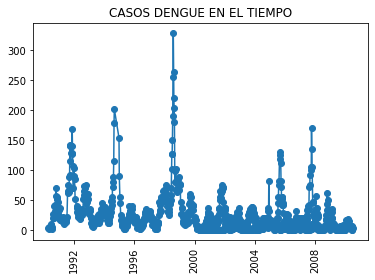

In [ ]:
x=data['week_start_date']
y=data['total_cases']
plt.figure
plt.plot(x,y,marker="o")
plt.xticks(rotation=90)
plt.title("CASOS DENGUE EN EL TIEMPO")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



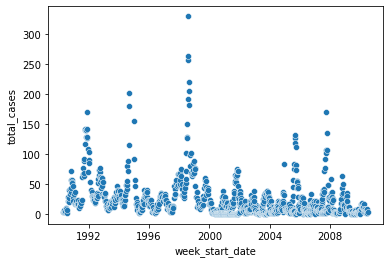

In [ ]:
sns.scatterplot(data['week_start_date'], data['total_cases'])
sns.set(rc = {'figure.figsize':(20,8)})

**Graficamos todas las variables en función de la variable que intentamos predecir**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

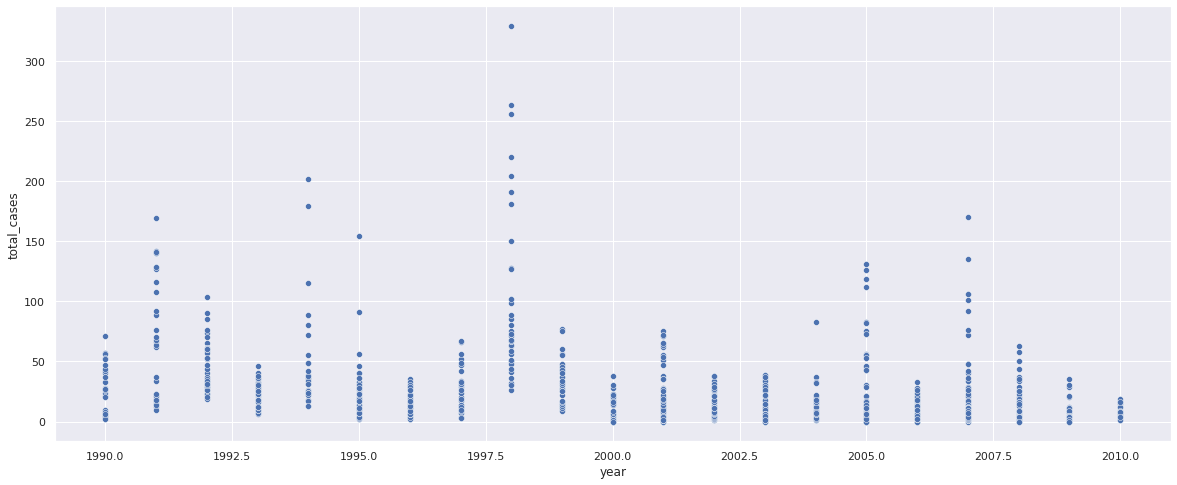

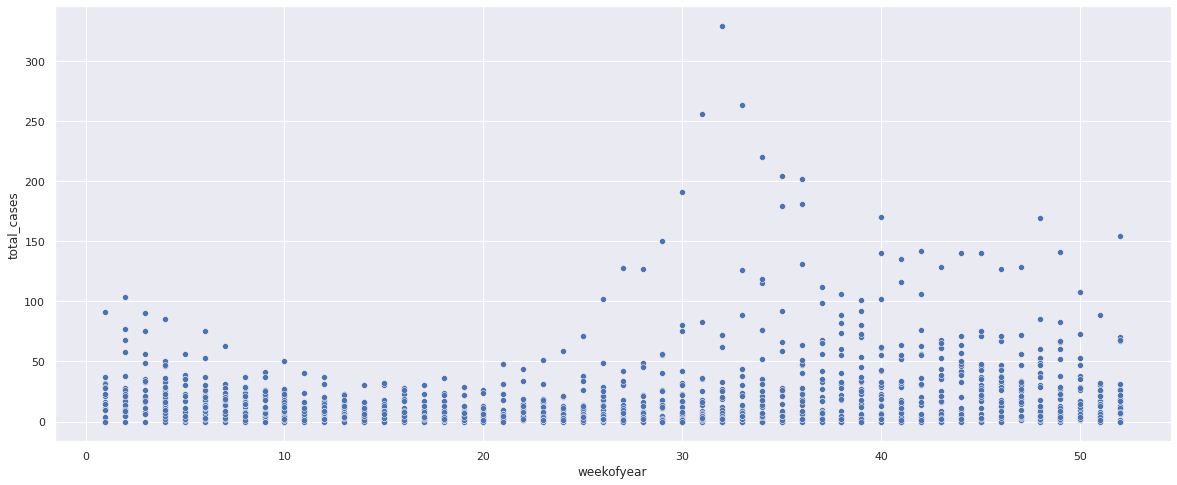

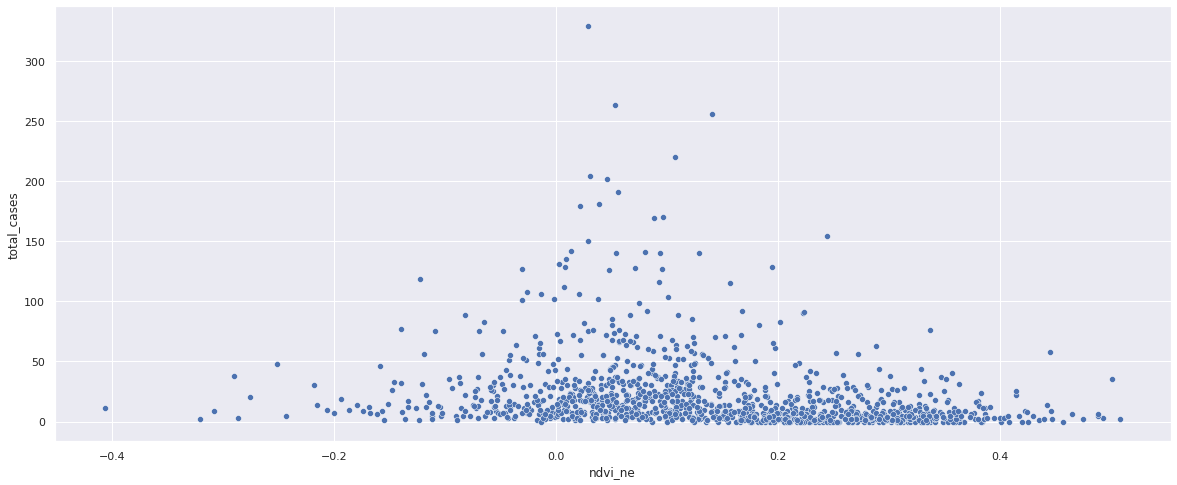

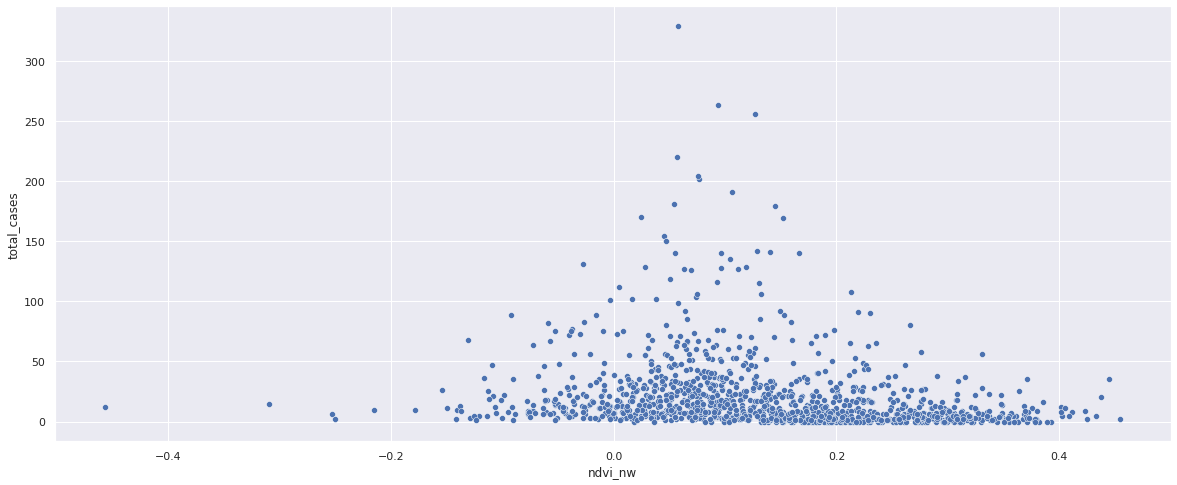

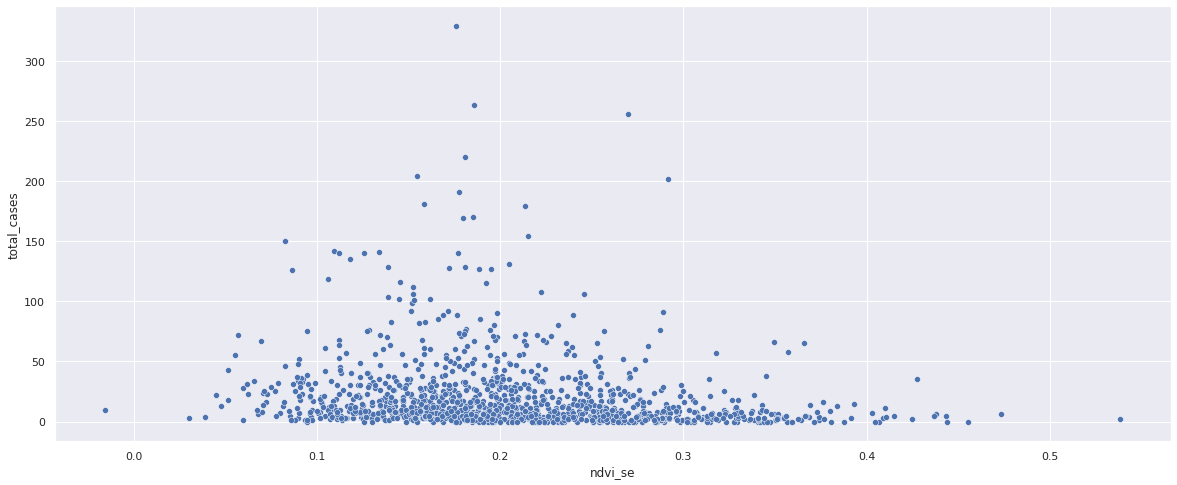

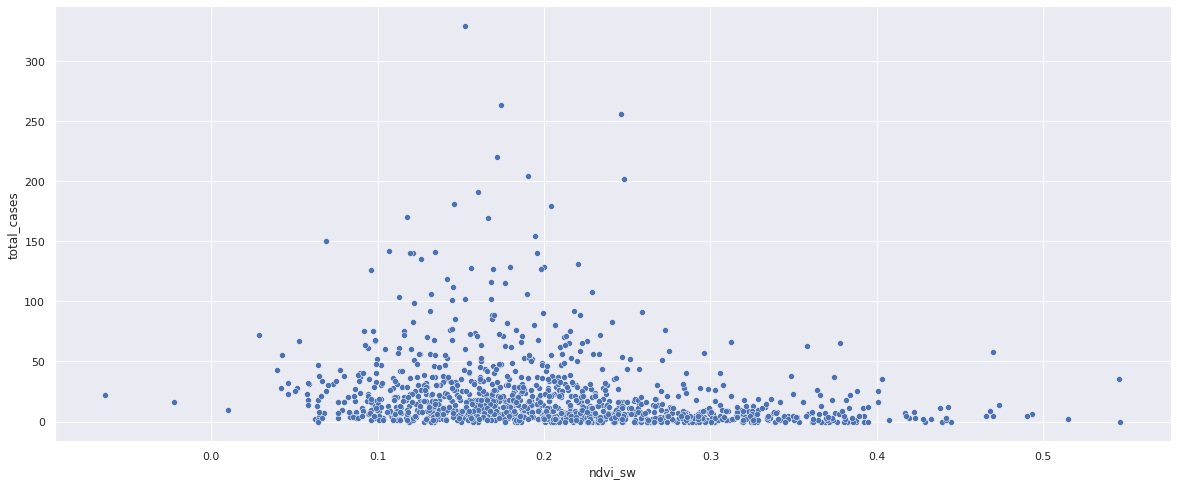

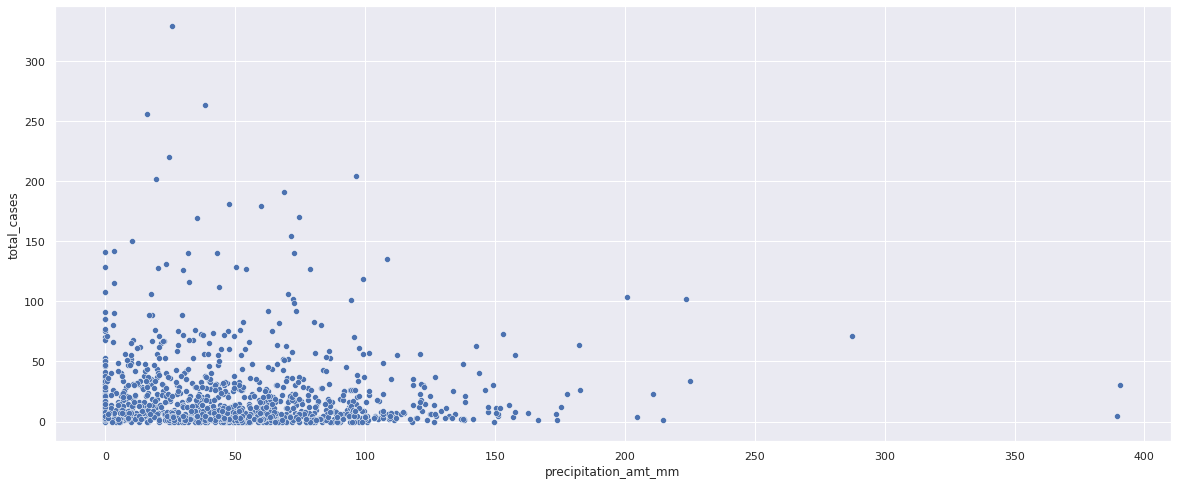

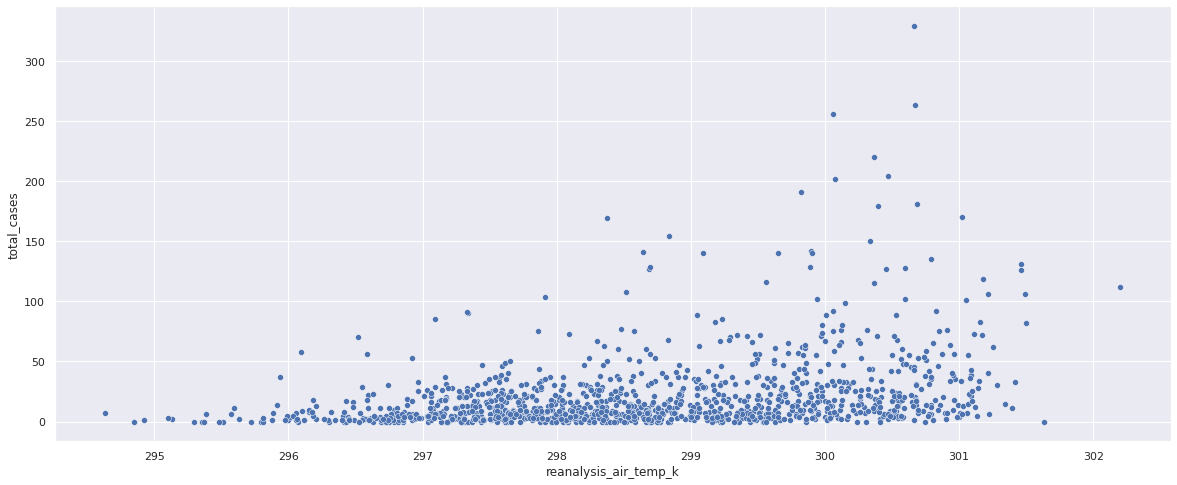

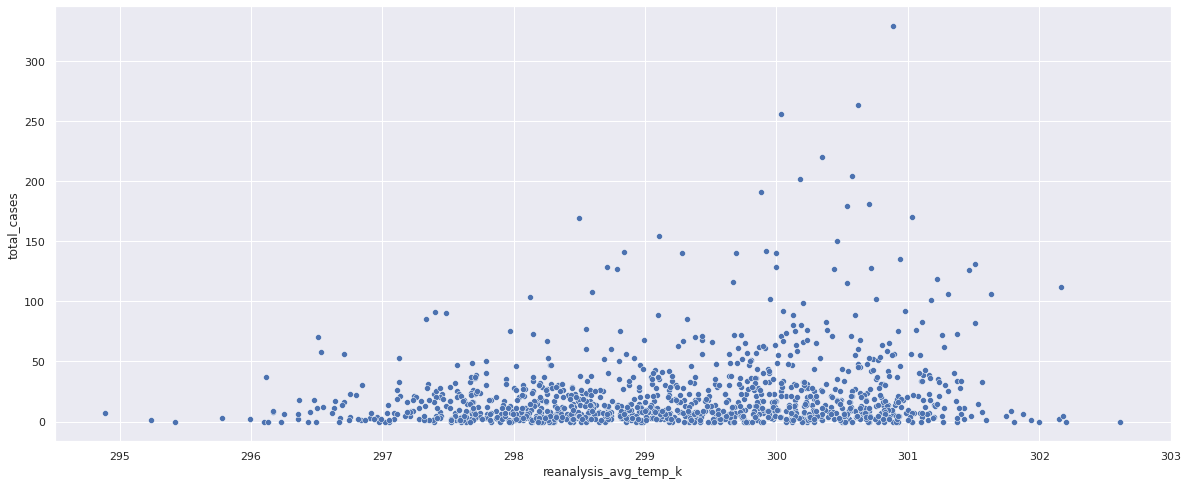

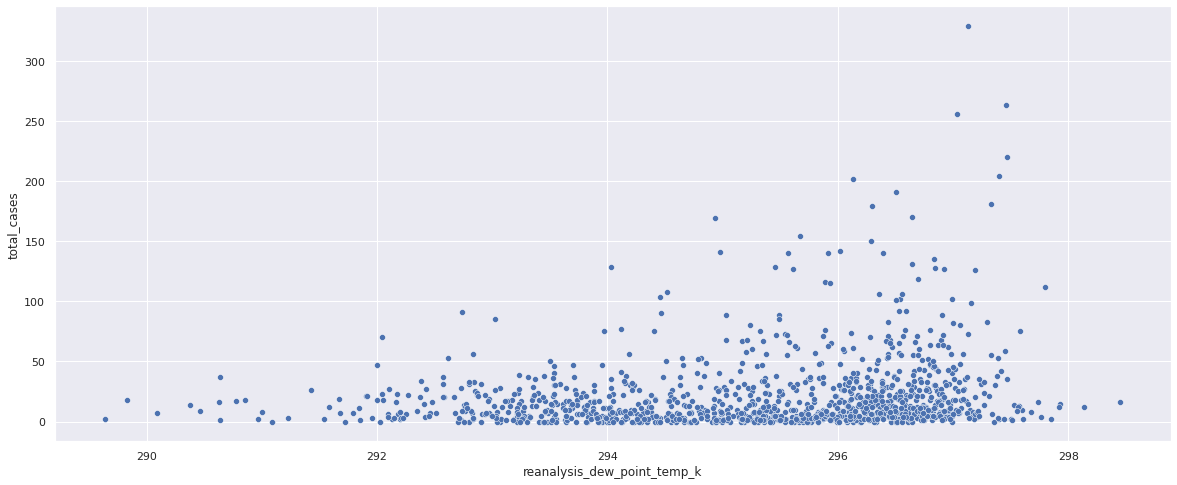

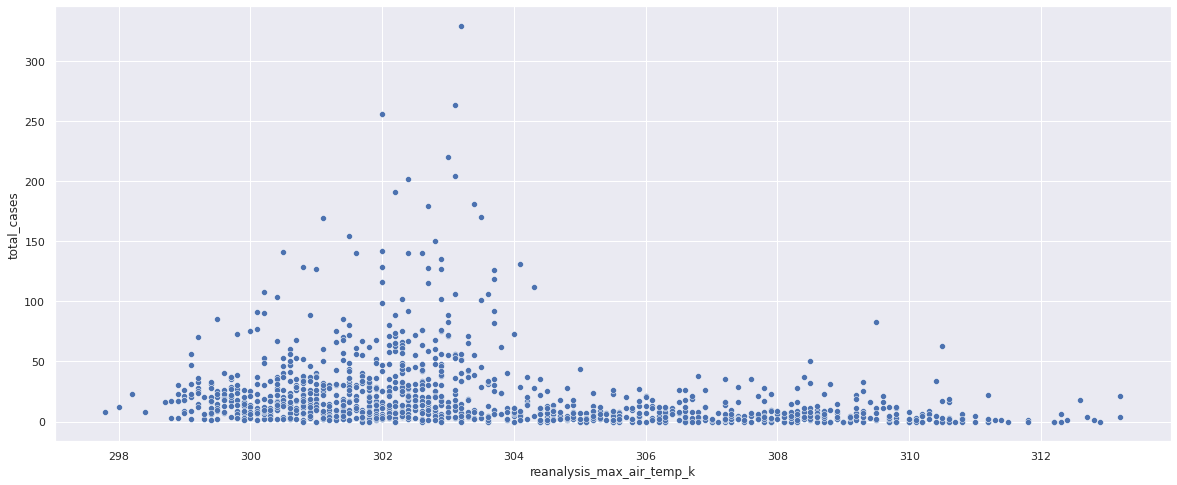

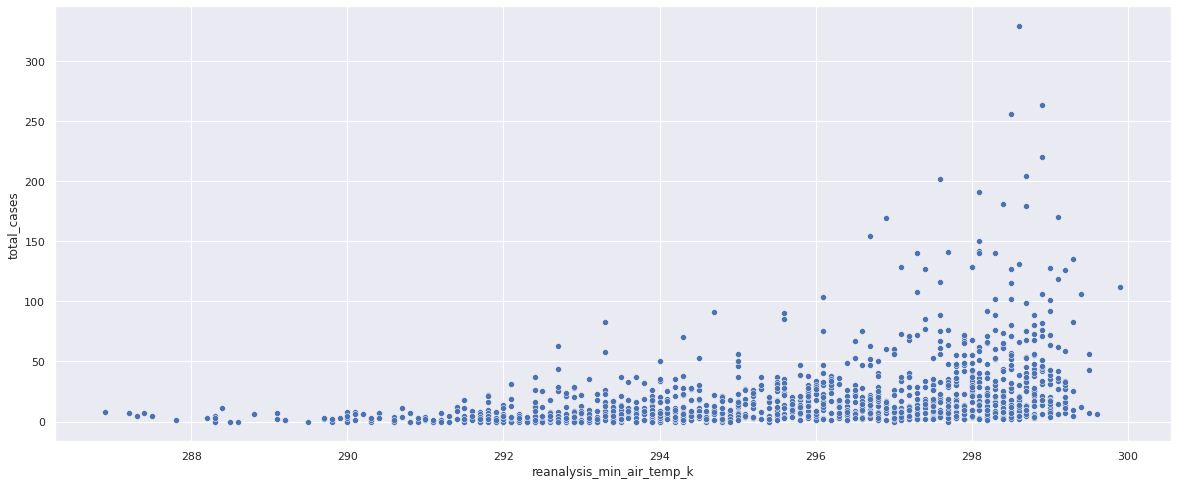

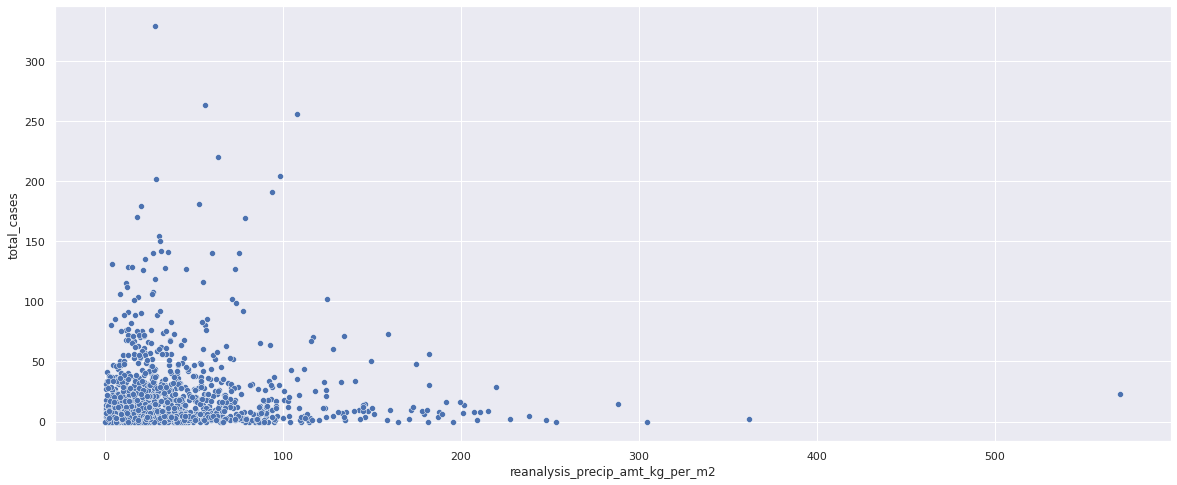

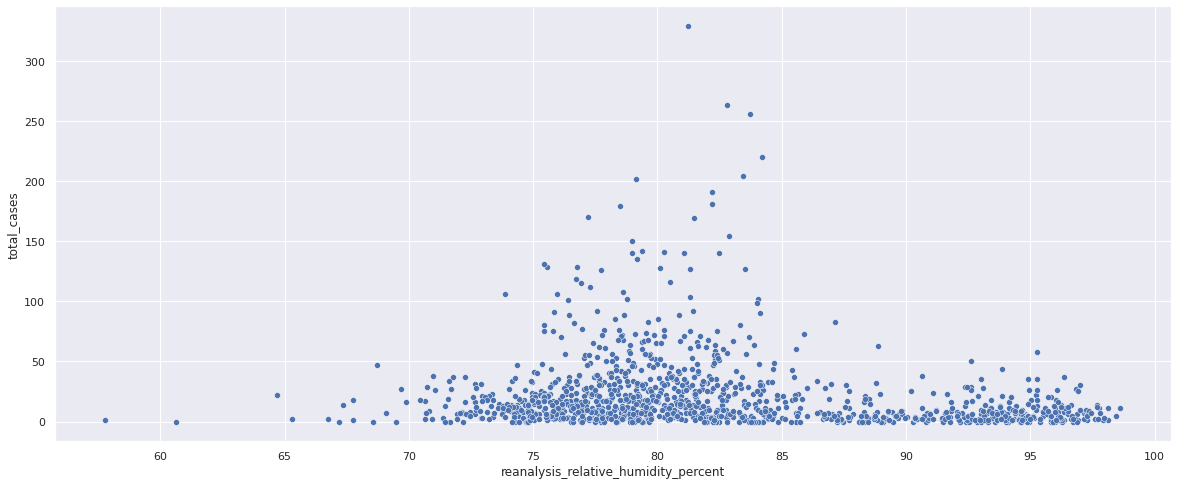

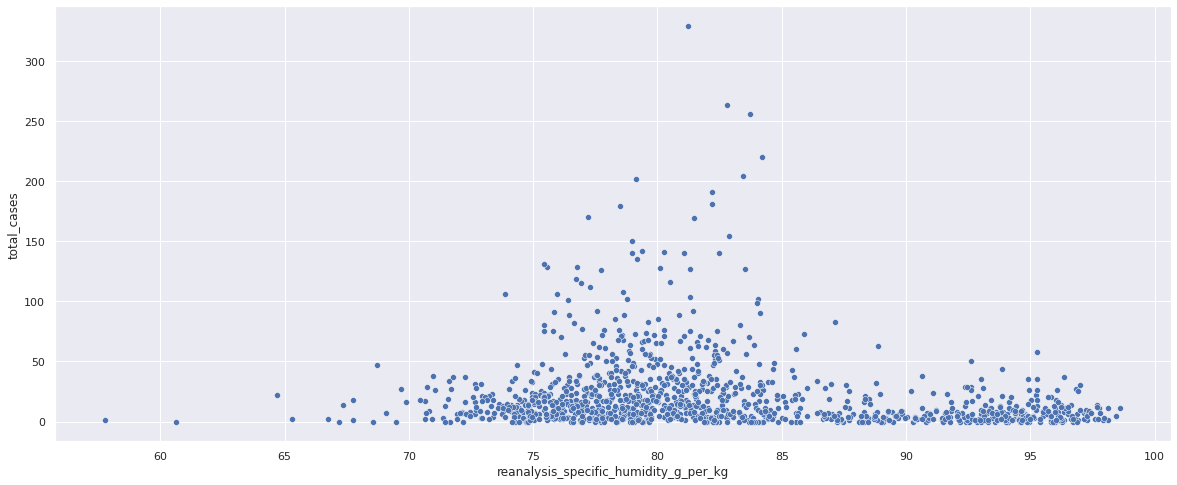

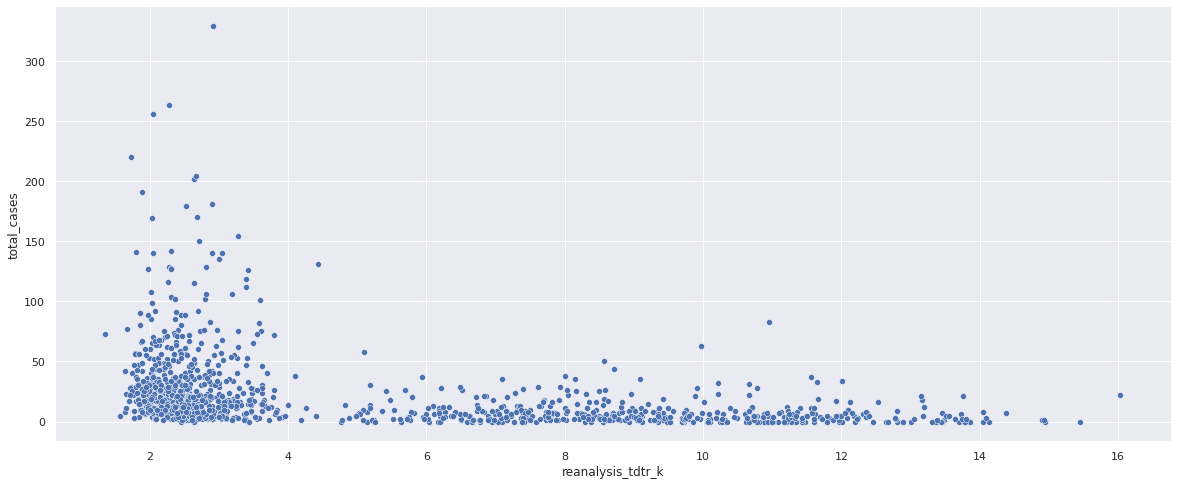

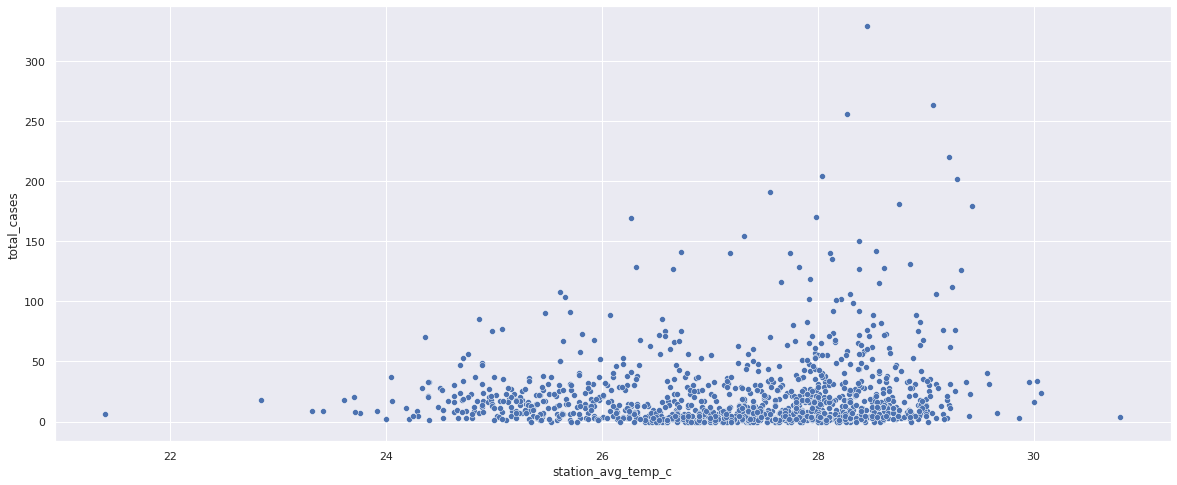

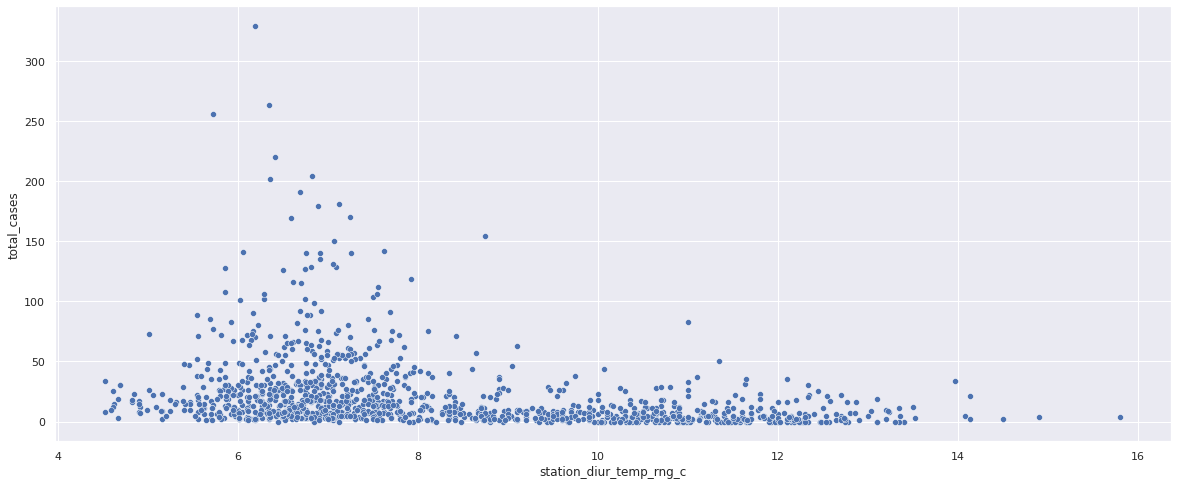

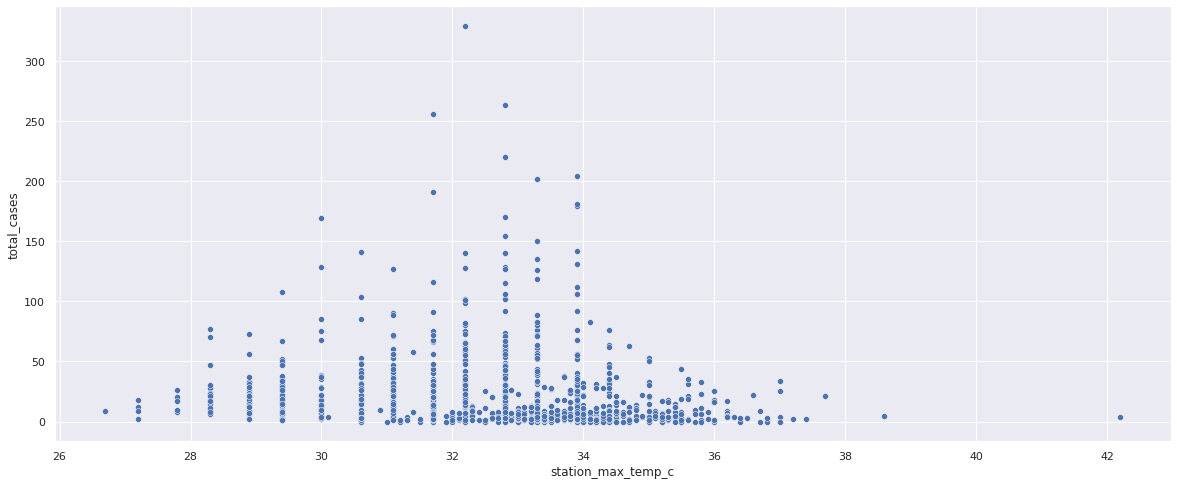

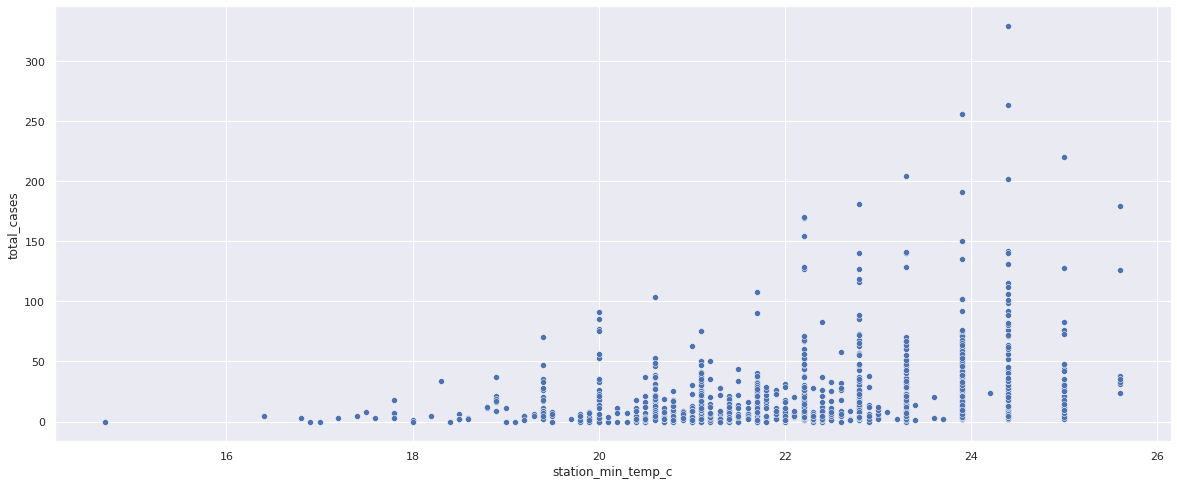

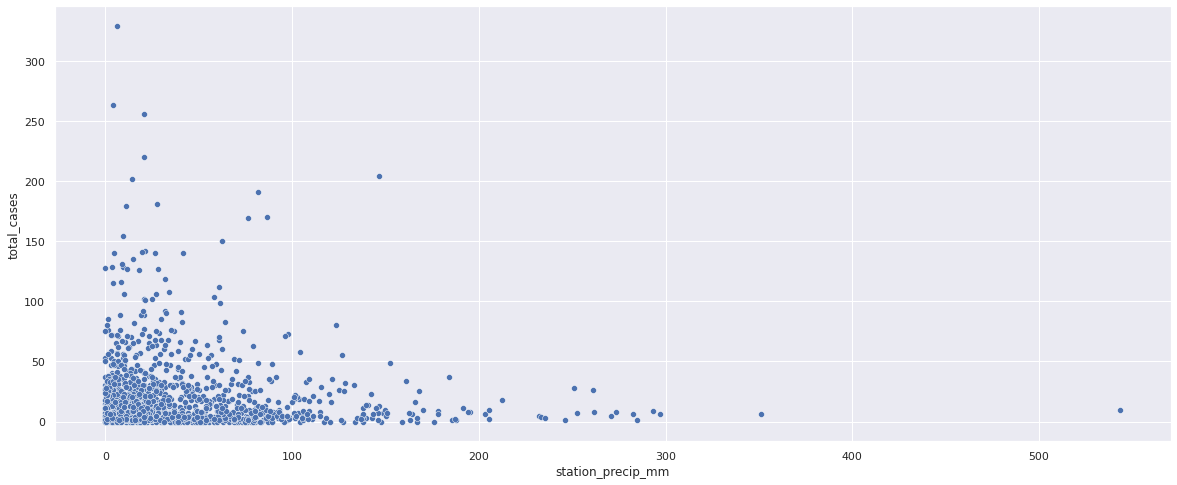

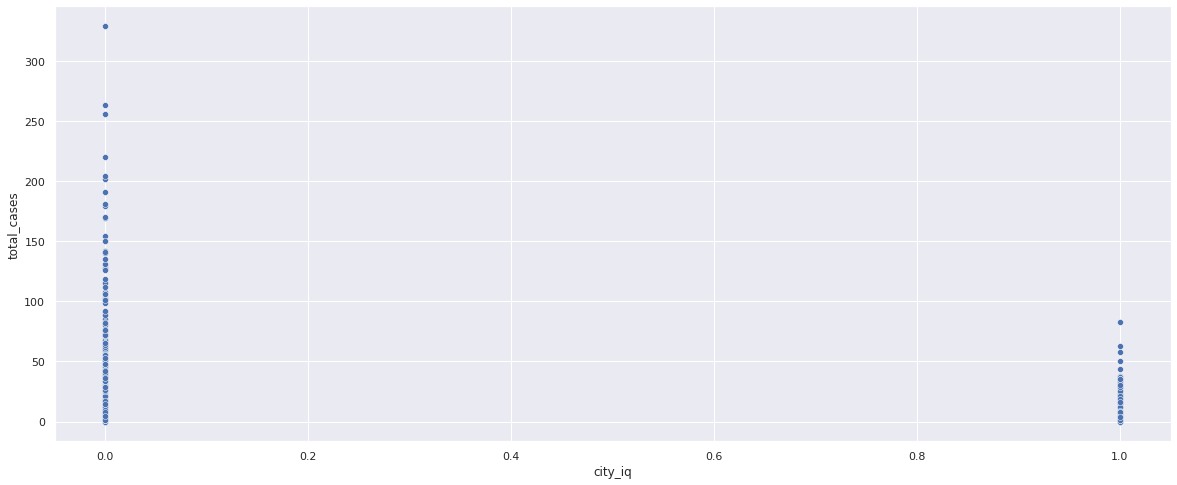

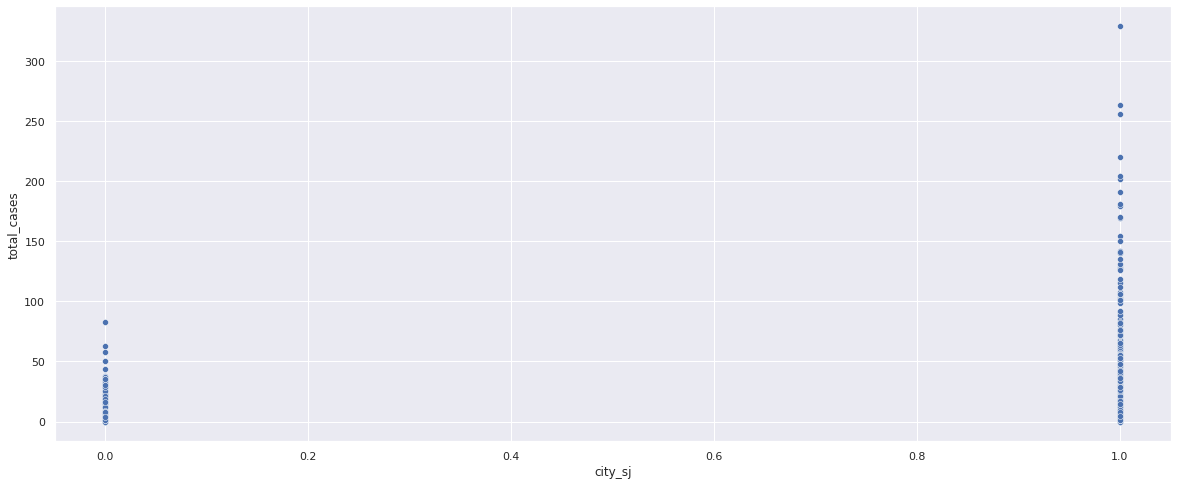

In [ ]:
for n,i in enumerate(data.drop(columns=['total_cases','week_start_date']).columns):
  try:
    plt.figure(n)
    sns.scatterplot(data[i], data['total_cases'])
  
  except:
    print('error')

## Análisis Multivariado

**Vamos a hacer un análisis multivariado tomando varios features y llevarlos a columnas o dimensiones para poder graficarlos en un tipo de gráfico plano**

In [ ]:
# Separamos la data del valor que queremos predecir SIN NANS
data_no_nans   = data.dropna();
data_sin_label = data_no_nans[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']];
data_label     = data_no_nans['total_cases'];

# Preparamos el modelo de PCA (componentes principales)
pca             = PCA(n_components=2)
X_r             = pca.fit(data_sin_label).transform(data_sin_label);
new_df          = pd.DataFrame();
new_df['Col_1'] = X_r[:,0];
new_df['Col_2'] = X_r[:,1];
new_df['Casos'] = data_label;

Hacemos el gráfico con la primer columna calculada

Text(0, 0.5, 'Casos totales')

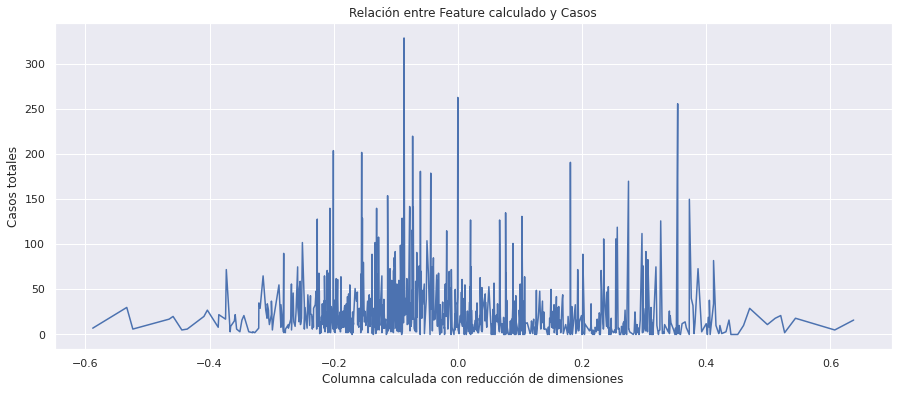

In [ ]:
plt.subplots(figsize=(15,6))
grafico = sns.lineplot(data = new_df, x = 'Col_1', y = 'Casos')
grafico.set_title('Relación entre Feature calculado y Casos')
grafico.set_xlabel('Columna calculada con reducción de dimensiones')
grafico.set_ylabel('Casos totales')

Hacemos el gráfico con la segunda columna calculada

Text(0, 0.5, 'Casos totales')

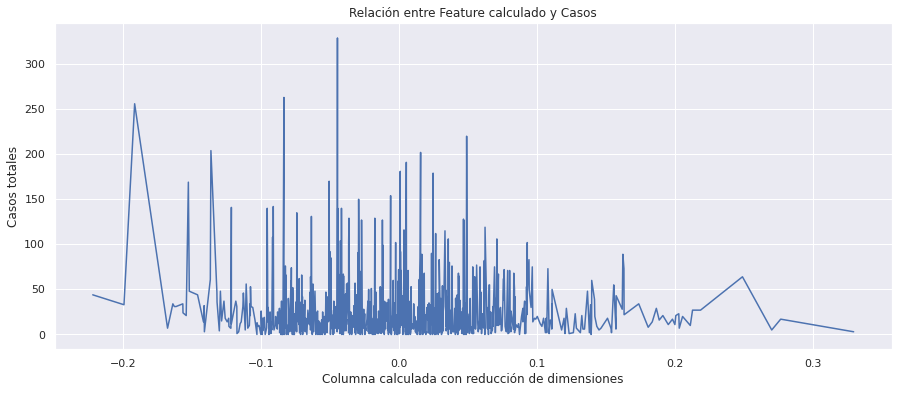

In [ ]:
plt.subplots(figsize=(15,6))
grafico = sns.lineplot(data = new_df, x = 'Col_2', y = 'Casos')
grafico.set_title('Relación entre Feature calculado y Casos')
grafico.set_xlabel('Columna calculada con reducción de dimensiones')
grafico.set_ylabel('Casos totales')

Mirámos la relación entre las dos columnas calculadas sin el label

Text(0, 0.5, 'Casos totales')

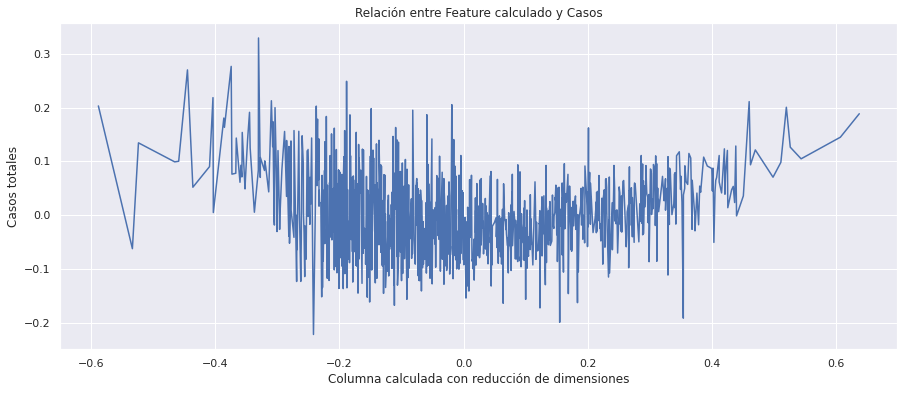

In [ ]:
plt.subplots(figsize=(15,6))
grafico = sns.lineplot(data = new_df, x = 'Col_1', y = 'Col_2')
grafico.set_title('Relación entre Feature calculado y Casos')
grafico.set_xlabel('Columna calculada con reducción de dimensiones')
grafico.set_ylabel('Casos totales')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



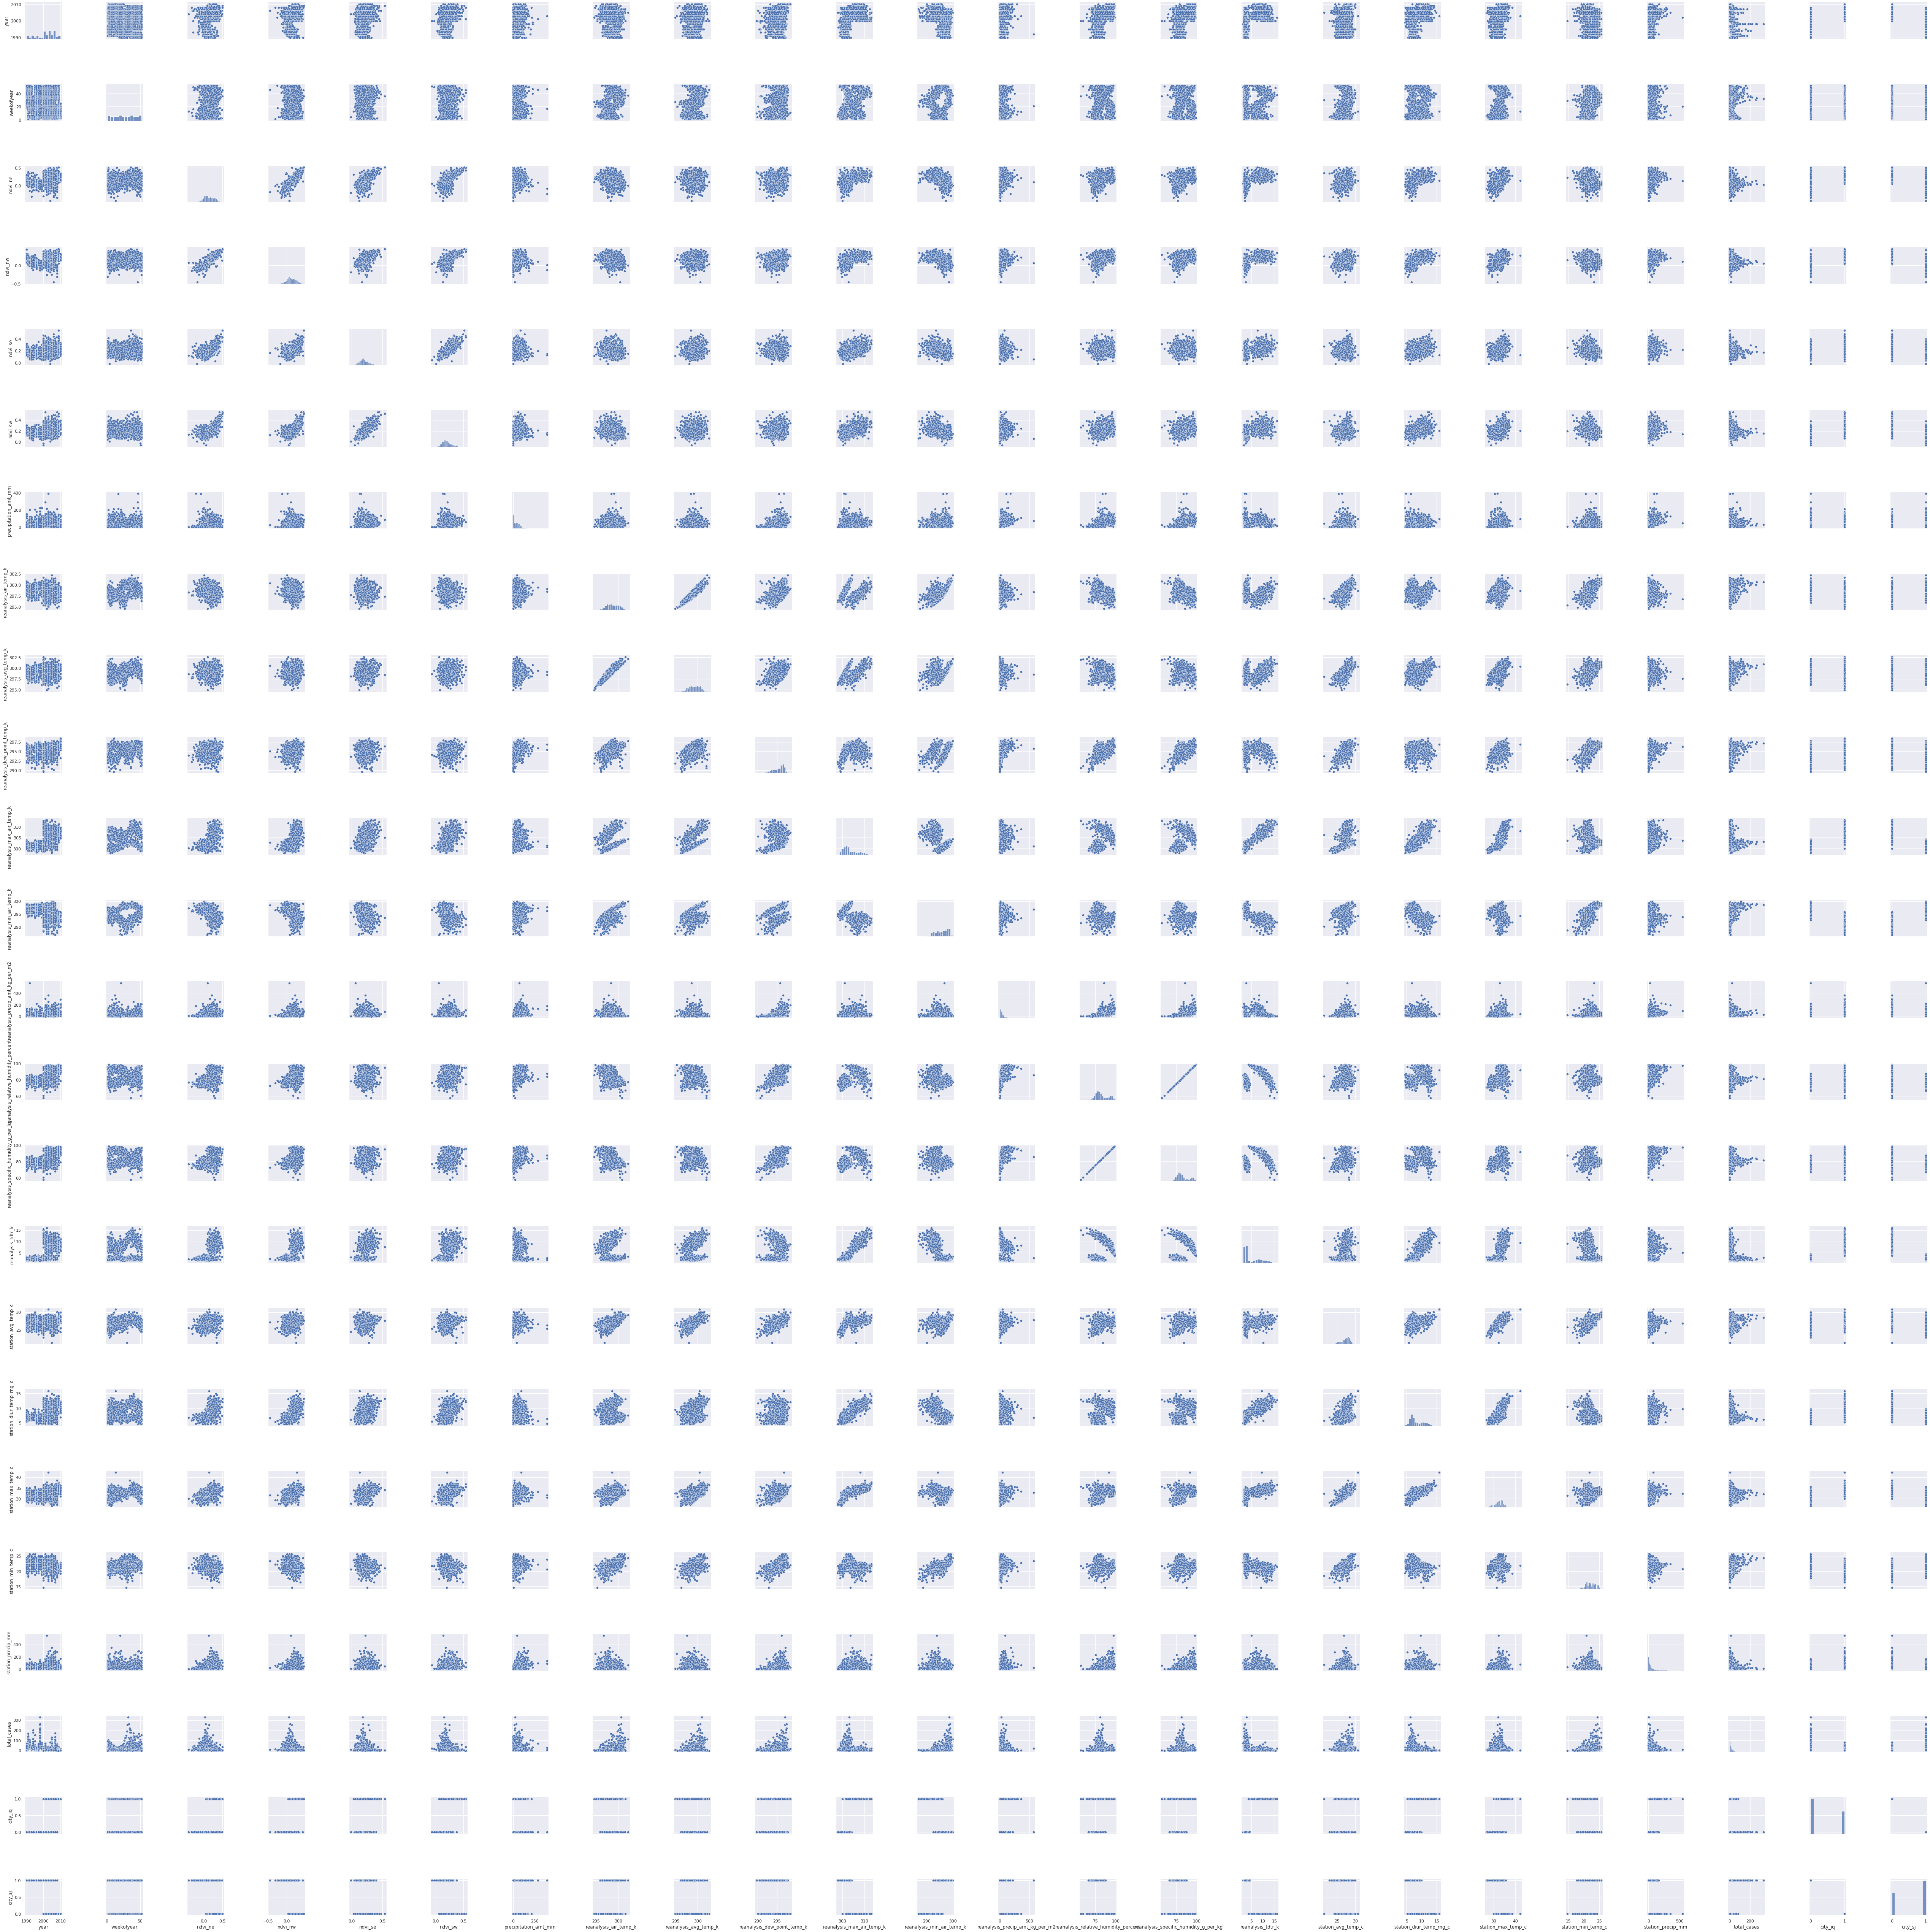

In [ ]:
#Pairplot
sns.pairplot(data, size = 3 , palette = 'Set2')

## Arbol de Clasificación

Bloque de importación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

Ponemos la información de una manera optima para el arbol de desición

In [ ]:
data['anio'] = data['week_start_date'].dt.year
data['mes']  = data['week_start_date'].dt.month
data['dia']  = data['week_start_date'].dt.day
data         = data.drop(columns=['year','week_start_date']);

Separamos el dataset en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'total_cases'),data['total_cases'],random_state = 123);

### Instanciamos el modelo con una profundidad de 2 y lo ajustamos

In [ ]:
modelo = DecisionTreeRegressor(max_depth = 2,random_state = 123);
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=123)

Observamos lo que resulta del modelo

Profundidad del árbol: 2
Número de nodos terminales: 4


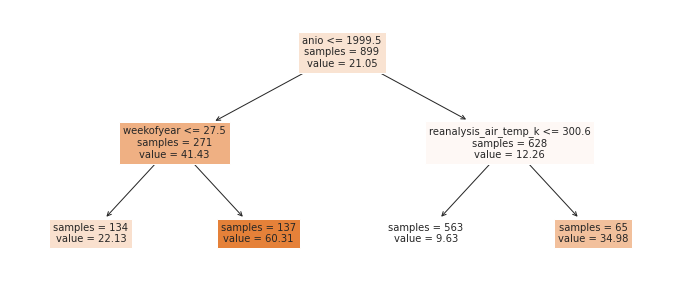

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data.drop(columns = 'total_cases').columns,
            class_names   = 'total_cases',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Nos fijamos que tan bien predice nuestro modelo

In [ ]:
print(mean_squared_error(modelo.predict(X_train),y_train));
print(mean_squared_error(modelo.predict(X_test),y_test))

656.3143297490468
648.9857345916018


### Instanciamos el modelo con una profundidad de 2-max y lo ajustamos.

In [ ]:
modelo_optimo         = [];
error_total           = [];
diff_error_train_test = [];

for i in range(1,12):

  modelo = DecisionTreeRegressor(max_depth = i,random_state = 123);
  modelo.fit(X_train, y_train);

  error_aux = mean_squared_error(modelo.predict(X_test),y_test);
  error_total.append(error_aux);
  diff_error_train_test.append(abs(error_aux - mean_squared_error(modelo.predict(X_train),y_train)));

  modelo_optimo.append(modelo);

Vamos a graficar para ver que profundidad de arbol nos ha dado el mejor valor de error y el mejor entrenamiento del modelo

Text(0, 0.5, 'Error cuadratico medio')

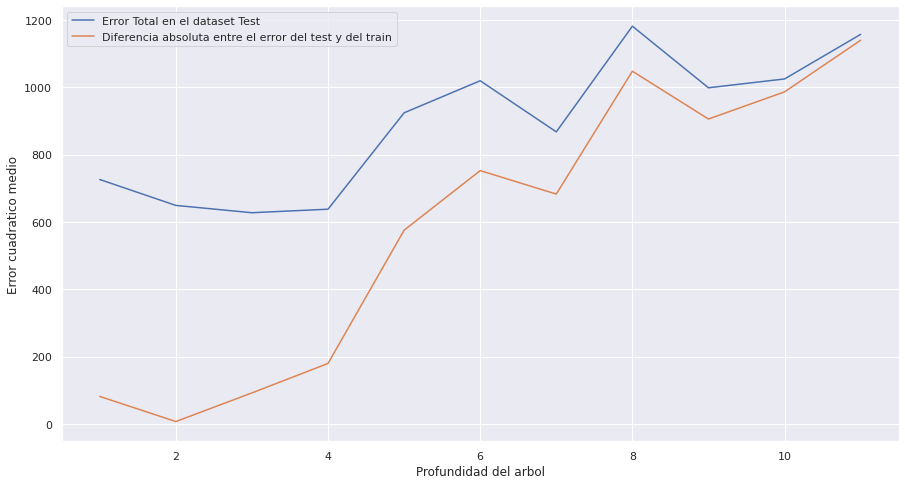

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(range(1,12),error_total, label = 'Error Total en el dataset Test')
plt.plot(range(1,12),diff_error_train_test, label = 'Diferencia absoluta entre el error del test y del train')
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error cuadratico medio')

Podemos notar que el modelo tiene un error menor en una profundidad de 3-4 mientras que la diferencia entre el error en test y train es mínima en la profundidad de 2, por lo tanto podemos concluir que la mejor profundidad para el arbol y por lo tanto el mejor modelo, será con una profundidad de 3

In [ ]:
modelo = modelo_optimo[2]

### Prueba de nuestro modelo

Text(0, 0.5, 'Total de casos de dengue')

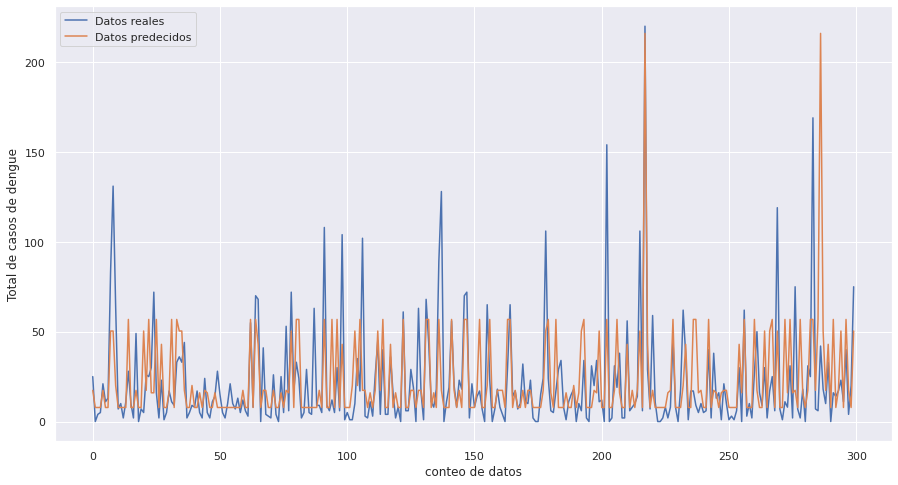

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(range(len(X_test)),
         y_test,
         label='Datos reales');
plt.plot(range(len(X_test)),
         modelo.predict(X_test),
         label='Datos predecidos');
plt.legend()
plt.xlabel('conteo de datos')
plt.ylabel('Total de casos de dengue')

Podemos ver que nuestro modelo si bien intenta seguir las tendencias es bastante ineficiente para lograr predecir correctamente, por lo tanto vamos a graficar la diferencia entre las predicciones y las reales

Text(0, 0.5, 'Total de casos de dengue')

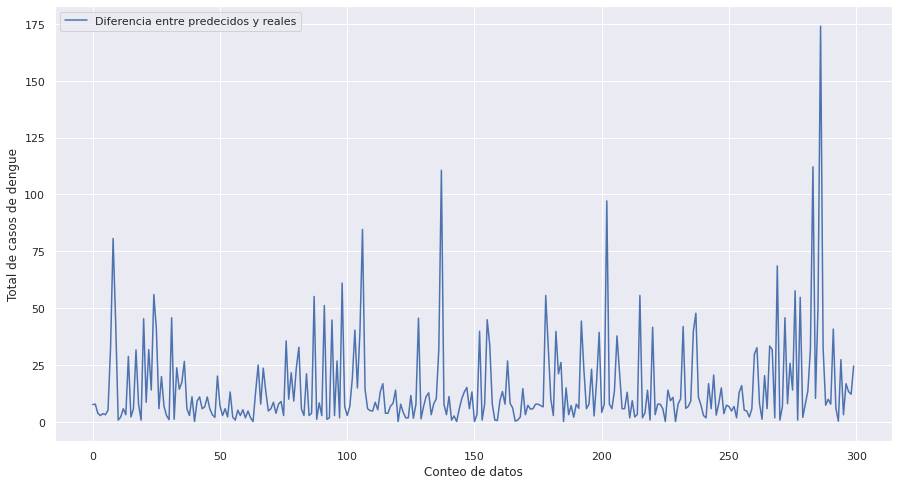

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(range(len(X_test)),
         abs(y_test-modelo.predict(X_test)),
         label='Diferencia entre predecidos y reales');
plt.legend()
plt.xlabel('Conteo de datos')
plt.ylabel('Total de casos de dengue')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer

Separamos nuevamente el train-test

In [ ]:
numero_aleatorio = np.random.randint(999);
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'total_cases'),data['total_cases'],random_state = numero_aleatorio);

Instanciamos el modelo con un estado aleatorio, con boostrap activado para evitar overfitting y lo ajustamos 

In [ ]:
random_forest = RandomForestClassifier(random_state = numero_aleatorio,
                                       bootstrap    = True);
random_forest.fit(X_train, y_train);

El error será de:

In [ ]:
mean_squared_error(y_test,random_forest.predict(X_test))

837.4333333333333

Probamos random forest con mayor profundidad y utilizando grid search

In [ ]:
param_grid    = {"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12]} # Profundidad desde 1 hasta 50
mean          = make_scorer(mean_squared_error );

Instanciamos el modelo y entrenamos el modelo

In [ ]:
gs = GridSearchCV(random_forest, param_grid, cv = 3, scoring = mean);
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=805),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring=make_scorer(mean_squared_error))

Ahora preguntamos por los mejores parámetros

In [ ]:
gs.best_params_

{'max_depth': 1}

El error será de:

In [ ]:
mean_squared_error(y_test,gs.predict(X_test))

1330.52

## Regresión lineal

### Feature engineering

Crearemos nuevas columnas de caracteristicas con el fin de tener mas parámetros para alimentar el modelo. En principio el propósito de esta sección será el de lograr para una misma carácteristica agrandar las formas posibles que tengan sus datos. Por ejemplo para una caracteristica normal el modelo creará la siguiente forma:

\begin{equation}
Y = \alpha x
\end{equation}

Sin embargo para enriquecer el modelo agregaremos columnas al cuadrado y con su raiz cuadrada con lo cual tendremos:

\begin{equation}
Y = \alpha x^2 + \beta x + \gamma \sqrt{x}
\end{equation}

Este modelo podría llegar a captar sutilezas que se perderian en modelo con columnas lineales

In [ ]:
data.head()

weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0          18  0.122600  0.103725  0.198483  0.177617                 12.42   
1          19  0.169900  0.142175  0.162357  0.155486                 22.82   
2          20  0.032250  0.172967  0.157200  0.170843                 34.54   
3          21  0.128633  0.245067  0.227557  0.235886                 15.36   
4          22  0.196200  0.262200  0.251200  0.247340                  7.52   

   reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.572857             297.742857                   292.414286   
1             298.211429             298.442857                   293.951429   
2             298.781429             298.878571                   295.434286   
3             298.987143             299.228571                   295.310000   
4             299.518571             299.664286                   295.821429   

   reanalysis_max_air_temp_k  ...  station_diur_temp_rng_c  \
0                      299.8  ...                 6.900000   
1                      300.9  ...                 6.371429   
2                      300.5  ...                 6.485714   
3                      301.4  ...                 6.771429   
4                      301.9  ...                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  \
0                29.4                20.0               16.0            4   
1                31.7                22.2                8.6            5   
2                32.2                22.8               41.4            4   
3                33.3                23.3                4.0            3   
4                35.0                23.9                5.8            6   

   city_iq  city_sj  anio  mes  dia  
0        0        1  1990    4   30  
1        0        1  1990    5    7  
2        0        1  1990    5   14  
3        0        1  1990    5   21  
4        0        1  1990    5   28  

[5 rows x 26 columns]

Primero fabricamos las columnas al cuadrado

In [ ]:
tipos_de_datos = list(set([data[i].dtype for i in data.columns]))
print('Los tipos de datos que tenemos en el dataset son: ',tipos_de_datos)

Los tipos de datos que tenemos en el dataset son:  [dtype('uint8'), dtype('int64'), dtype('float64')]


Aprovechando que ya hemos convertido a todos en datos del tipo numérico podremos realizar las transformaciones correspondientes. Los unicos datos que sacaremos de los datos serán aquellos correspondientes a fechas y datos correspondientes a dummies hechos anterioremente (los 'uint8')

In [ ]:
data_feature_engineering = data.copy();
for i in data_feature_engineering.columns:
  if data_feature_engineering[i].dtype != tipos_de_datos[0] and i not in ['anio','mes','dia','weekofyear','total_cases']:
    # Elevamos al cuadrado la columna.
    data_feature_engineering[i+'^2']       = data_feature_engineering[i]**2;
    # Aplicamos raiz cuadrada a la columna.
    data_feature_engineering[i+'^0.5'] = np.sqrt(data_feature_engineering[i]);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in sqrt



In [ ]:
data_feature_engineering.head()

weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0          18  0.122600  0.103725  0.198483  0.177617                 12.42   
1          19  0.169900  0.142175  0.162357  0.155486                 22.82   
2          20  0.032250  0.172967  0.157200  0.170843                 34.54   
3          21  0.128633  0.245067  0.227557  0.235886                 15.36   
4          22  0.196200  0.262200  0.251200  0.247340                  7.52   

   reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.572857             297.742857                   292.414286   
1             298.211429             298.442857                   293.951429   
2             298.781429             298.878571                   295.434286   
3             298.987143             299.228571                   295.310000   
4             299.518571             299.664286                   295.821429   

   reanalysis_max_air_temp_k  ...  station_avg_temp_c^2  \
0                      299.8  ...            647.338980   
1                      300.9  ...            713.653061   
2                      300.5  ...            713.653061   
3                      301.4  ...            754.679388   
4                      301.9  ...            837.688980   

   station_avg_temp_c^0.5  station_diur_temp_rng_c^2  \
0                5.044091                  47.610000   
1                5.168586                  40.595102   
2                5.168586                  42.064490   
3                5.241319                  45.852245   
4                5.379857                  87.823673   

   station_diur_temp_rng_c^0.5  station_max_temp_c^2  station_max_temp_c^0.5  \
0                     2.626785                864.36                5.422177   
1                     2.524169               1004.89                5.630275   
2                     2.546707               1036.84                5.674504   
3                     2.602197               1108.89                5.770615   
4                     3.061279               1225.00                5.916080   

   station_min_temp_c^2  station_min_temp_c^0.5  station_precip_mm^2  \
0                400.00                4.472136               256.00   
1                492.84                4.711688                73.96   
2                519.84                4.774935              1713.96   
3                542.89                4.827007                16.00   
4                571.21                4.888763                33.64   

   station_precip_mm^0.5  
0               4.000000  
1               2.932576  
2               6.434283  
3               2.000000  
4               2.408319  

[5 rows x 64 columns]

### Entrenamiento del modelo

Crearemos el modelo regresión lineal

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Para el modelo es necesario no tener nulls por lo tanto los eliminamos

In [ ]:
data_feature_engineering_notnulls = data_feature_engineering.dropna();

Separamos en train y test

In [ ]:
numero_aleatorio = np.random.randint(999);
X_train, X_test, y_train, y_test = train_test_split(data_feature_engineering_notnulls.drop(columns = 'total_cases'),data_feature_engineering_notnulls['total_cases'],random_state = numero_aleatorio);

Agregamos la constante necesaria para el modelo

In [ ]:
# Adding a constant to get an intercept
X_sm_train = sm.add_constant(X_train);
X_sm_test  = sm.add_constant(X_test);

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Instanciamos el modelo

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_sm_train).fit()

# Printing the parameters
lr.params

const                    -6.329166e+07
weekofyear                4.867958e-01
ndvi_ne                  -1.935456e+02
ndvi_nw                   9.988695e+01
ndvi_se                   2.345837e+02
                              ...     
station_max_temp_c^0.5   -2.593416e+03
station_min_temp_c^2      5.714008e+00
station_min_temp_c^0.5    3.854419e+03
station_precip_mm^2      -3.060254e-04
station_precip_mm^0.5    -2.670258e+00
Length: 64, dtype: float64

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     5.418
Date:                Mon, 09 May 2022   Prob (F-statistic):           4.03e-29
Time:                        03:48:21   Log-Likelihood:                -3443.5
No. Observations:                 732   AIC:                             7007.
Df Residuals:                     672   BIC:                             7283.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                     -6.329e+07   3.94e+07     -1.608      0.108   -1.41e+08     1.4e+07
weekofyear                                    0.4868      0.549      0.887      0.375      -0.591       1.565
ndvi_ne                                    -193.5456    219.101     -0.883      0.377    -623.750     236.659
ndvi_nw                                      99.8870    254.636      0.392      0.695    -400.091     599.865
ndvi_se                                     234.5837    692.619      0.339      0.735   -1125.374    1594.541
ndvi_sw                                    -455.0919    591.785     -0.769      0.442   -1617.062     706.878
precipitation_amt_mm                         -0.1808      0.226     -0.800      0.424      -0.625       0.263
reanalysis_air_temp_k                     -1.002e+06   5.53e+05     -1.812      0.070   -2.09e+06    8.38e+04
reanalysis_avg_temp_k                      7.608e+05   5.36e+05      1.419      0.156   -2.92e+05    1.81e+06
reanalysis_dew_point_temp_k               -2.545e+05   1.92e+05     -1.323      0.186   -6.32e+05    1.23e+05
reanalysis_max_air_temp_k                 -5.158e+04    4.7e+04     -1.097      0.273   -1.44e+05    4.07e+04
reanalysis_min_air_temp_k                 -9.407e+04   7.64e+04     -1.231      0.219   -2.44e+05     5.6e+04
reanalysis_precip_amt_kg_per_m2              -0.2232      0.199     -1.121      0.263      -0.614       0.168
reanalysis_relative_humidity_percent         32.0091     80.659      0.397      0.692    -126.365     190.383
reanalysis_specific_humidity_g_per_kg        32.2171     80.675      0.399      0.690    -126.188     190.622
reanalysis_tdtr_k                             8.6290     26.357      0.327      0.743     -43.123      60.381
station_avg_temp_c                        -1990.3943   1964.725     -1.013      0.311   -5848.132    1867.344
station_diur_temp_rng_c                     -83.1001    112.417     -0.739      0.460    -303.832     137.631
station_max_temp_c                          323.0365    750.918      0.430      0.667   -1151.392    1797.465
station_min_temp_c                         -659.6908    518.000     -1.274      0.203   -1676.784     357.403
station_precip_mm                             0.2220      0.138      1.613      0.107      -0.048       0.492
city_iq                                   -3.165e+07   1.97e+07     -1.608      0.108   -7.03e+07       7e+06
city_sj                                   -3.165e+07   1.97e+07     -1.608      0.108   -7.03e+07       7e+06
anio                                         -1.7434      0.339     -5.141      0.000      -2.409      -1.078
mes                                          -1.1928      2.396     -0.498      0.619      -5.897       3.511
dia

In [ ]:
# Predicting y_value using traingn data of X
y_pred = lr.predict(X_sm_test);

print('El error del modelo será de: ',mean_squared_error(y_pred,y_test))

El error del modelo será de:  742.1286193591098
